<a href="https://colab.research.google.com/github/balajimt/HarmonicSearch/blob/main/HarmonySearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

harmony_memory = []
def GenerateInitPopulation(G, affected_node, harmony_memory_size):
    neighbors = [i for i in G.neighbors(affected_node)]
    for i in range(0, harmony_memory_size):    
        random_adjacent_node = neighbors[random.randrange(len(neighbors))]
        harmony_memory.append(set([affected_node, random_adjacent_node]))
    return harmony_memory

def PitchAdjustment(G, solution):
    contact = random.sample(solution, 1)
    components = HillClimbing(G, contact)
    return solution.union(components)

def indirectContactTrace(queue1, queue2):
    max_q1 = queue1[0]
    min_q2 = queue2[-1]
    
    # This means that there is no infection
    if max_q1 < min_q2:
        return False
    
    return True

def HillClimbing(G, contact):
    component = set()
    contact = contact[0]
    index = 0
    grandparent = contact
    parent = random.sample([i for i in G.neighbors(contact)],1)[0]
    
    for i in range(100):
        parent_contact_vector = FindVectorInGraph(G, parent, contact)
        grandparent_parent_vector = FindVectorInGraph(G, grandparent, parent)
        component = component.union(set([contact]))
        neighbors = [i for i in G.neighbors(contact)]
        for adjacent_node in neighbors:
            if indirectContactTrace(grandparent_parent_vector, parent_contact_vector): 
                component = component.union(set([adjacent_node]))
        grandparent = parent
        parent = contact
        contact = random.sample([i for i in G.neighbors(contact)],1)[0]
        
    return component

def FindVectorInGraph(G, contact1, contact2):
    return G[contact1][contact2]['weight']

def FindWorstSolution(harmony_memory):
    index = 10**5
    min_length = 10**5
    for i in range(len(harmony_memory)):
        if len(harmony_memory[i]) < min_length:
            min_length = len(harmony_memory[i])
            index = i
    return harmony_memory[index], index

def FindBestSolution(harmony_memory):
    index = -1
    max_length = -1
    for i in range(len(harmony_memory)):
        if len(harmony_memory[i]) > max_length:
            max_length = len(harmony_memory[i])
            index = i
    return harmony_memory[index], index

def HarmonySearch(G, affected_node):
    improvisations = 5
    harmony_memory_size = 100
    harmony_memory_considering_rate = 0.5
    pitch_adjustment_rate = 0.1
    harmony_memory = GenerateInitPopulation(G, affected_node, harmony_memory_size)
    for i in range(0, improvisations):
        index = random.randrange(len(harmony_memory))
        solution = harmony_memory[index]
        for j in range(0, harmony_memory_size):
            if j == index:
                continue
            random_value = random.randrange(1)
            if (random_value >= harmony_memory_considering_rate) and solution.intersection(harmony_memory[j]):
                # Method 1
                solution = solution.union(harmony_memory[j])
                pitch_random = random.randrange(1)
                if pitch_random >= pitch_adjustment_rate:
                    # Method 2
                    solution = PitchAdjustment(G, solution)
            else:
                # Method 3
                solution = PitchAdjustment(G, solution)
        worst_solution, index = FindWorstSolution(harmony_memory)
        if len(solution) > len(worst_solution):
            harmony_memory[index] = solution
    return FindBestSolution(harmony_memory)

In [ ]:
import networkx as nx
from networkx.generators.random_graphs import erdos_renyi_graph, gnm_random_graph

def check_connected(G):
  if nx.is_connected(G):
    return False
  else:
    return True
def create_random_interaction_data():
  test_list = [i for i in range(6,0,-1)]
  test_list.pop(random.randrange(len(test_list)))
  test_list.pop(random.randrange(len(test_list)))
  test_list.pop(random.randrange(len(test_list)))
  return test_list
def create_graph(V,e):
  G = gnm_random_graph(V, e)
  edges = list(G.edges)
  for i in edges:
    if not G[i[0]][i[1]]:
      G[i[0]][i[1]]['weight'] = create_random_interaction_data()
      G[i[1]][i[0]]['weight'] = G[i[0]][i[1]]['weight']
  return G, V, edges

from timeit import default_timer as timer
for i in range(10, 10**4, 500):
  harmony_memory = []
  G, _, edges = create_graph(i, 4 * i)
  start = timer()
  x = HarmonySearch(G, 0)
  end = timer()
  print(i, end-start)

10 0.7533802420002758
510 1.6459094609999738
1010 2.338617699999304
1510 2.547030719000759
2010 2.9660603539996373
2510 3.1383019659997444
3010 3.1624196359998678
3510 3.248217385999851
4010 3.380059624999376
4510 3.8042960170005244
5010 3.3960539319996315
5510 3.46079741199992
6010 3.4932184220006093
6510 3.4962532600002305
7010 3.4575904700004685
7510 3.497019115000512
8010 3.5827349970004434
8510 3.592170659000658
9010 3.5748310760000095
9510 3.59481227499964


In [ ]:
import pandas as pd
df = pd.read_csv('results.txt', sep=' ')
df.head()

,population,time_taken
0,10,0.758013
1,510,1.651722
2,1010,2.371110
3,1510,2.572772
4,2010,2.988778


In [ ]:
import matplotlib.pyplot as plot

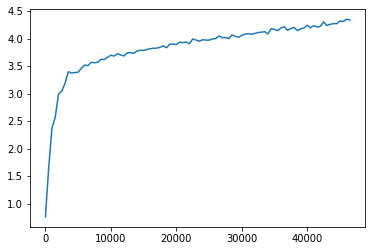

In [ ]:
plot.plot(df['population'], df['time_taken'])